In [1]:
import numpy as np
import pandas as pd
import nltk
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sent_tokenize

import os
import re

In [2]:
filenames, file_contents, year, month, location = [],[],[],[],[]

for filename in os.listdir("D:\Data's\Donald Trump"):
    filenames.append(filename)

    with open(f"D:\\Data's\\Donald Trump\\{filename}", encoding='utf-8', errors='ignore') as f:
        file_contents.append(f.read())
    
    year.append(filename[-8:-4])
    x = re.search("([A-z]+)([A-z]{3})([0-9]+)\_", filename)
    month.append(x.group(2))
    location.append(''.join(map(lambda x: x if x.islower() else " "+x, x.group(1)))) 

In [3]:
df = pd.DataFrame({
    'Location': location,
    'Month': month,
    'Year':year,
    'filename':filenames,
    'content': file_contents
})

In [4]:
df

,Location,Month,Year,filename,content
0,Battle Creek,Dec,2019,BattleCreekDec19_2019.txt,Thank you. Thank you. Thank you to Vice Presid...
1,Bemidji,Sep,2020,BemidjiSep18_2020.txt,There's a lot of people. That's great. Thank y...
2,Charleston,Feb,2020,CharlestonFeb28_2020.txt,Thank you. Thank you. Thank you. All I can say...
3,Charlotte,Mar,2020,CharlotteMar2_2020.txt,"I want to thank you very much. North Carolina,..."
4,Cincinnati,Aug,2019,CincinnatiAug1_2019.txt,Thank you all. Thank you very much. Thank you ...
5,Colorador Springs,Feb,2020,ColoradorSpringsFeb20_2020.txt,"Hello Colorado. We love Colorado, most beautif..."
6,Dallas,Oct,2019,DallasOct17_2019.txt,Thank you. Thank you very much. Hello Dallas. ...
7,Des Moines,Jan,2020,DesMoinesJan30_2020.txt,I worked so hard for this state. I worked so h...
8,Fayetteville,Sep,2020,FayettevilleSep19_2020.txt,"What a crowd, what a crowd. Get those people o..."
9,Fayetteville,Sep,2019,FayettevilleSep9_2019.txt,Thank you everybody. Thank you and Vice Presi...


In [5]:
rf=df

In [6]:
df.describe()

,Location,Month,Year,filename,content
count,35,35,35,35,35
unique,32,10,2,35,35
top,New Hampshire,Sep,2020,BattleCreekDec19_2019.txt,Thank you. Thank you. Thank you to Vice Presid...
freq,3,13,23,1,1


In [7]:
df1=df.groupby('Location')

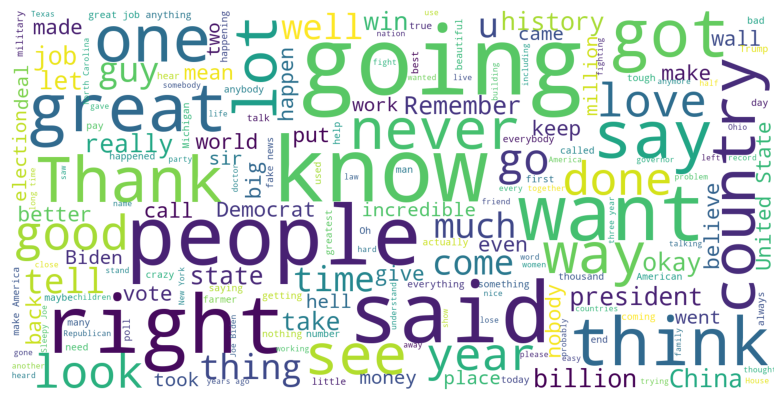

In [8]:
text = " ".join(content for content in df.content)
stopwordsNLTK = nltk.corpus.stopwords.words("english")
stopwords = set(STOPWORDS)
stopwords.update(stopwordsNLTK)

wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, background_color="white", random_state=42).generate(text)

fig = plt.figure(1, figsize=(8,8))
plt.imshow(wordcloud)
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()

In [9]:
from nltk import everygrams
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

from collections import Counter

text = ' '.join(df.content)
text = re.sub('\W+', ' ',text)
stopwordsNLTK.append('going')
tokenized_text = nltk.word_tokenize(text)
words = [w for w in tokenized_text if w.lower() not in stopwordsNLTK]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karthik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


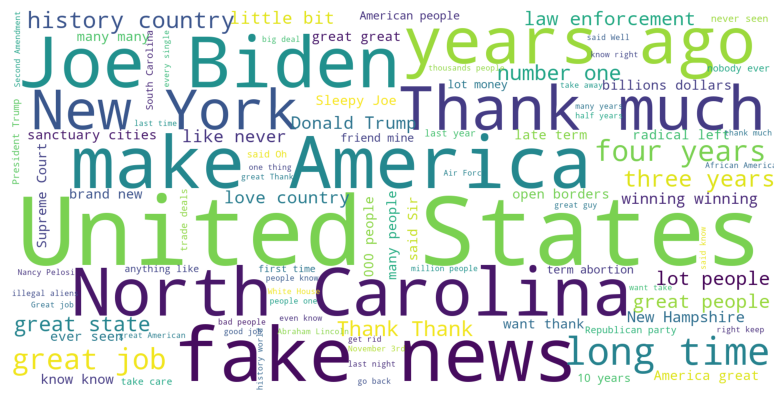

In [10]:
nwords=[]
for ngram in list(everygrams(words,2, 2)):
    nwords.append(" ".join(ngram))

word_count_dict=Counter(nwords)
wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=100,background_color="white").generate_from_frequencies(word_count_dict)

fig = plt.figure(1, figsize=(8,8))
plt.imshow(wordcloud)
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()


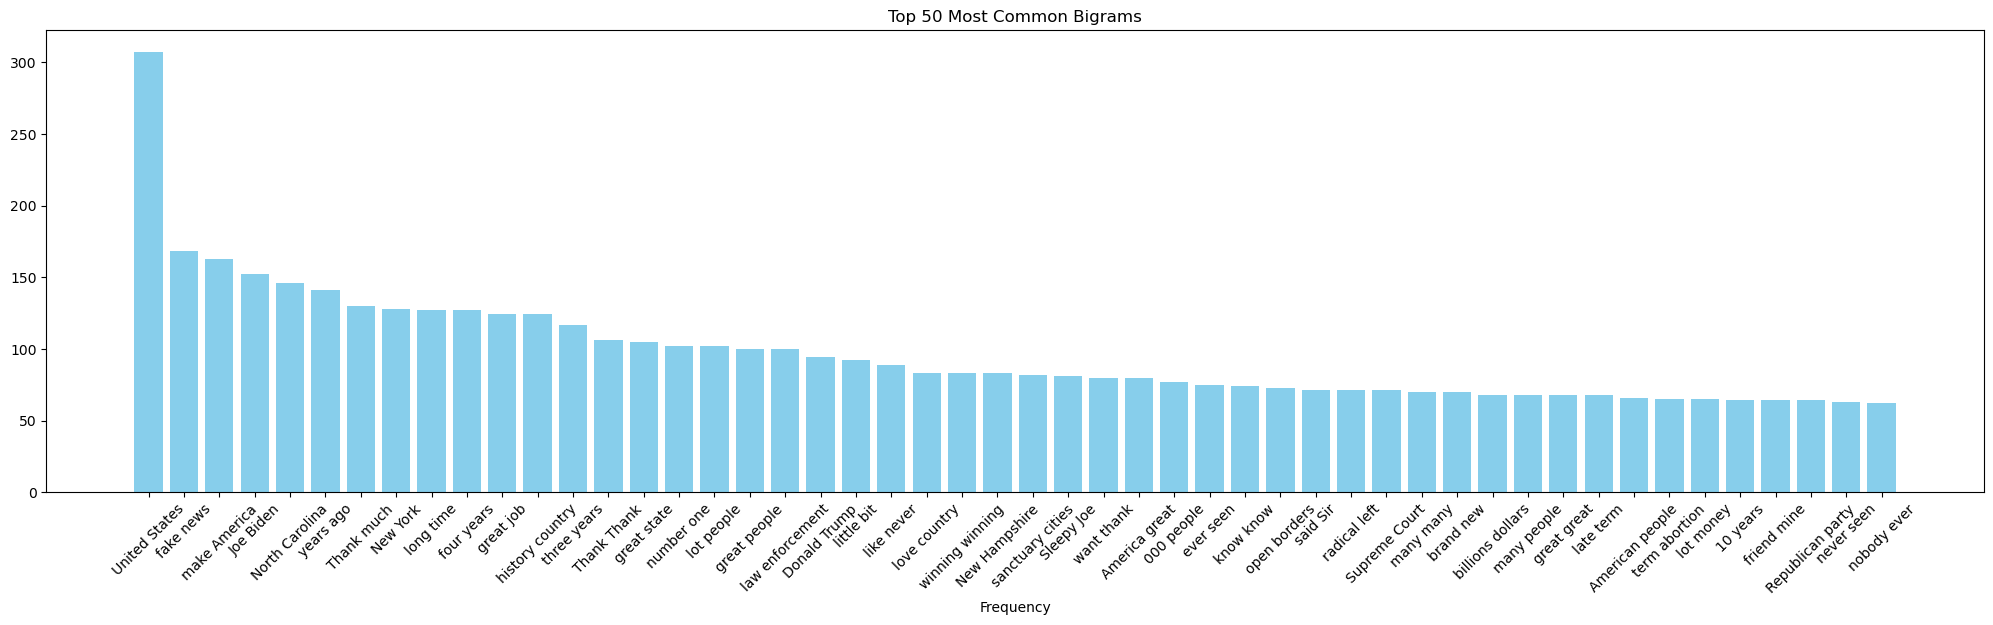

In [11]:
top_n = 50
top_bigrams = word_count_dict.most_common(top_n)
bigrams, counts = zip(*top_bigrams)# Separating the bigrams and their counts into two lists


plt.figure(figsize=(25, 6))
plt.bar(bigrams, counts, color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 50 Most Common Bigrams')
plt.xticks(rotation=45)
#plt.gca().invert_yaxis()  
plt.show()


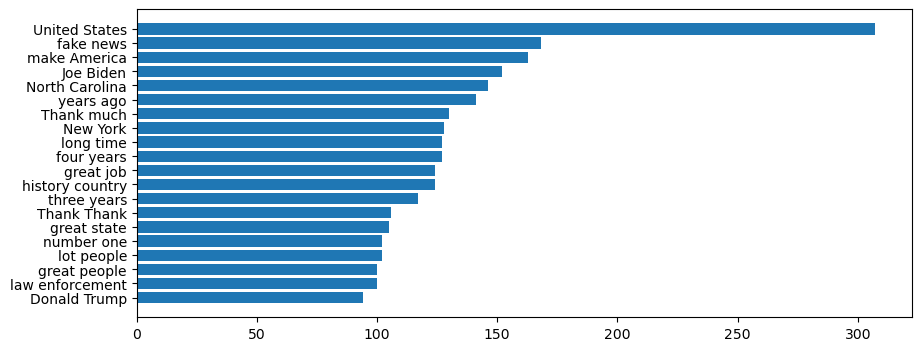

In [12]:
keys = (sorted(word_count_dict, key=word_count_dict.get, reverse=True))[:20]
values = []
for key in keys:
    values.append(word_count_dict[key])

plt.figure(figsize=(10, 4))
plt.barh(y=keys, width=values)
plt.gca().invert_yaxis()

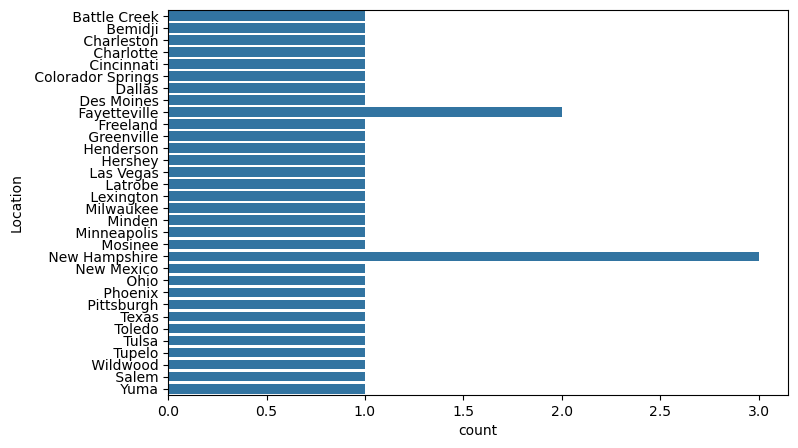

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(y='Location', data=df)
plt.show()

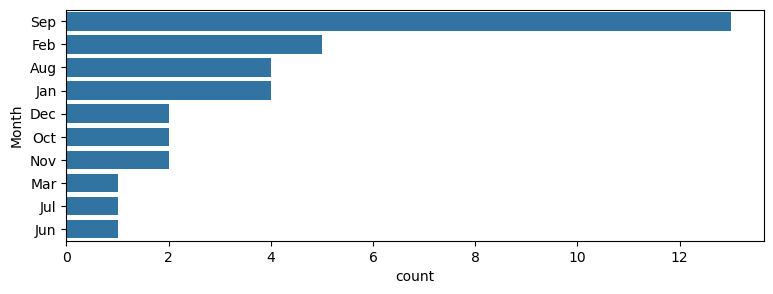

In [14]:
plt.figure(figsize=(9, 3))
Month_counts=df['Month'].value_counts()
sorted_Months = Month_counts.sort_values(ascending=False).index
sns.countplot(y='Month', data=df,order=sorted_Months)
plt.show()

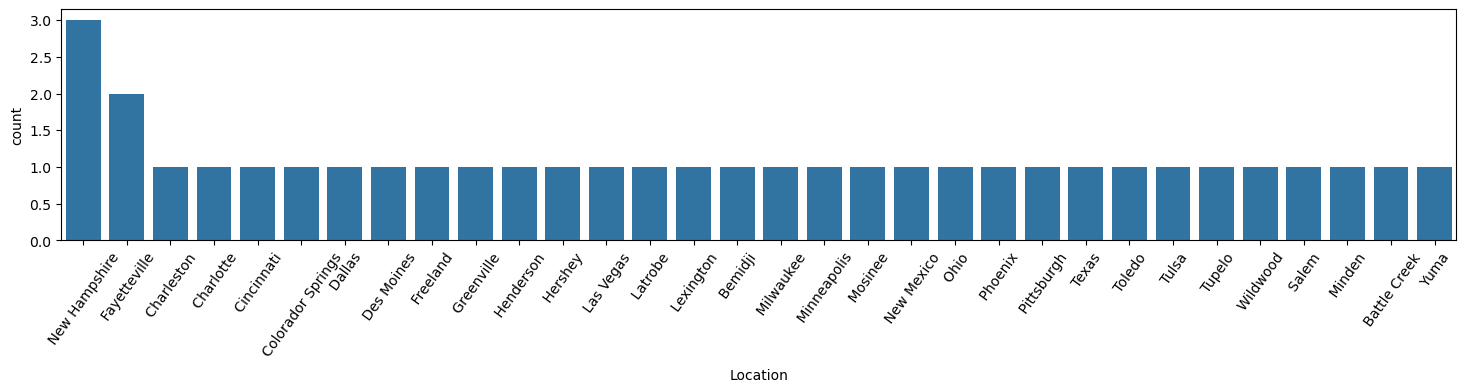

In [15]:
plt.figure(figsize=(18,3))
Location_sorted=df.Location.value_counts()
Location_sorted_trim=Location_sorted.sort_values(ascending=False).index
sns.countplot(x='Location', data=df,order=Location_sorted_trim)
plt.xticks(rotation=54)
plt.show()

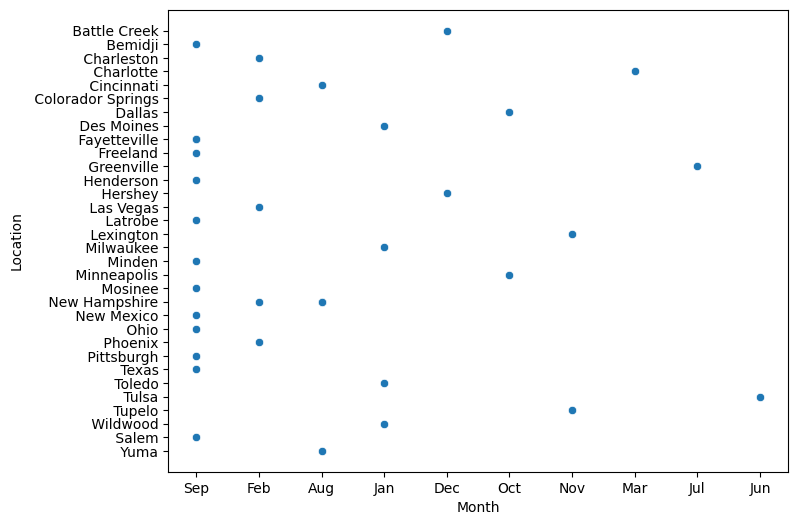

In [16]:
df_sorted = df
df_sorted['Month'] = pd.Categorical(df['Month'], categories=sorted_Months, ordered=True)
plt.figure(figsize=(8,6))
sns.scatterplot(x='Month',y='Location',data=df_sorted)
plt.show()

<Axes: xlabel='Location', ylabel='count'>

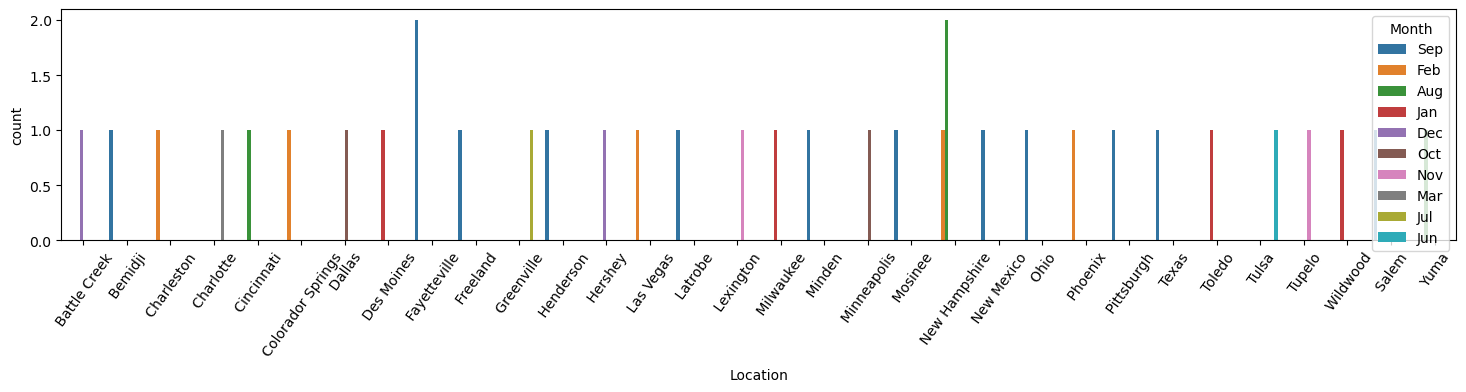

In [17]:
plt.figure(figsize=(18,3))
plt.xticks(rotation=54)
sns.countplot(x='Location', hue='Month',data=df_sorted)

C:\Users\Karthik\AppData\Local\Temp\ipykernel_19988\3663800147.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(df, values='Year', index='Location', columns='Month', aggfunc='count', fill_value=0)


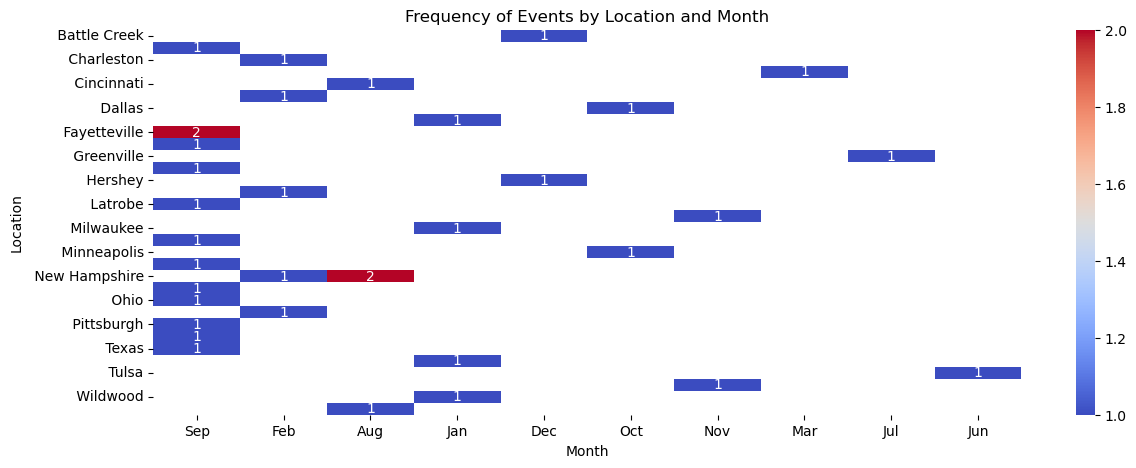

In [18]:
pivot_table = pd.pivot_table(df, values='Year', index='Location', columns='Month', aggfunc='count', fill_value=0)
mask = pivot_table == 0
plt.figure(figsize=(14, 5))
sns.heatmap(pivot_table, annot=pivot_table.values , mask=mask, cmap='coolwarm', fmt='d')
plt.xlabel('Month')
plt.ylabel('Location')
plt.title('Frequency of Events by Location and Month')
plt.show()

# Sentiment Analysis

In [20]:
from concurrent.futures import ThreadPoolExecutor, as_completed

df_st = pd.DataFrame(columns=['Location', 'Month', 'Year', 'Filename', 'Sentence', 'Negative', 'Positive', 'Neutral', 'Compound'])
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Function to process each sentence and get sentiment scores
def analyze_sentiment(ind):
    tokenized_text = sent_tokenize(df['content'][ind])
    results = []
    
    for token_text in tokenized_text:
        sentiment = sia.polarity_scores(token_text)
        results.append(
            {
                "Location": df['Location'][ind],
                "Month": df['Month'][ind],
                "Year": df['Year'][ind],
                "Filename": df['filename'][ind],
                "Sentence": token_text,
                "Negative": sentiment['neg'],
                "Positive": sentiment['pos'],
                "Neutral": sentiment['neu'],
                "Compound": sentiment['compound']
            }
        )
    return results

# Use ThreadPoolExecutor for parallel processing
all_results = []
with ThreadPoolExecutor(max_workers=8) as executor:
    future_to_index = {executor.submit(analyze_sentiment, ind): ind for ind in df.index}
    
    for future in as_completed(future_to_index):
        all_results.extend(future.result())

# Convert the list of results to a DataFrame and concatenate
df_st = pd.concat([df_st, pd.DataFrame(all_results)], ignore_index=True)

# Show the DataFrame
df_st.head()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Karthik\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\Karthik\AppData\Local\Temp\ipykernel_19988\3629175049.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_st = pd.concat([df_st, pd.DataFrame(all_results)], ignore_index=True)


,Location,Month,Year,Filename,Sentence,Negative,Positive,Neutral,Compound
0,Charleston,Feb,2020,CharlestonFeb28_2020.txt,Thank you.,0.000,0.714,0.286,0.3612
1,Charleston,Feb,2020,CharlestonFeb28_2020.txt,Thank you.,0.000,0.714,0.286,0.3612
2,Charleston,Feb,2020,CharlestonFeb28_2020.txt,Thank you.,0.000,0.714,0.286,0.3612
3,Charleston,Feb,2020,CharlestonFeb28_2020.txt,All I can say is that the fake news just doesn...,0.193,0.000,0.807,-0.4767
4,Charleston,Feb,2020,CharlestonFeb28_2020.txt,They don't get it.,0.000,0.000,1.000,0.0000


In [21]:
df_st.shape

(37699, 9)

In [22]:
low_Negative_order=df_st[(df_st['Negative']) > 0.000].sort_values(by=['Negative']).head(20)

In [23]:
low_Negative_order[['Location','Negative']].head(3)

,Location,Negative
32810,Pittsburgh,0.016
20665,Las Vegas,0.017
31511,New Mexico,0.019


C:\Users\Karthik\AppData\Local\Temp\ipykernel_19988\2085658329.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Location',x='Negative', data=low_Negative_order_1,palette='viridis', errorbar=None)


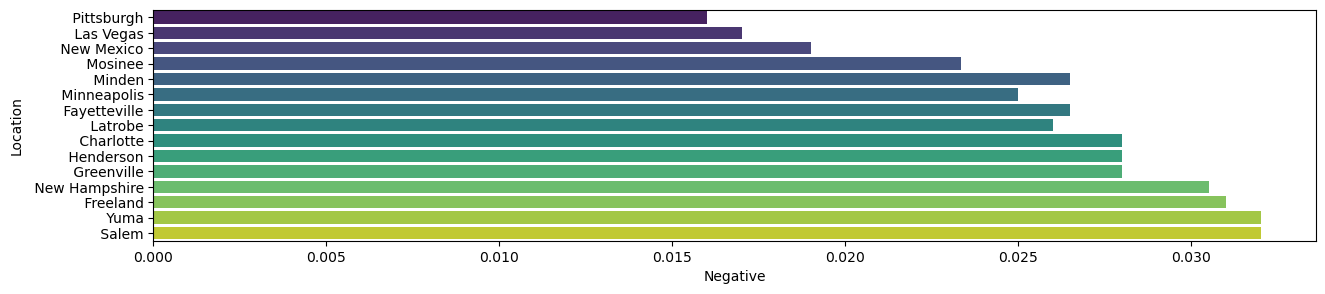

In [24]:
plt.figure(figsize=(15,3))
low_Negative_order_1=pd.DataFrame(low_Negative_order)
sns.barplot(y='Location',x='Negative', data=low_Negative_order_1,palette='viridis', errorbar=None)
plt.show()

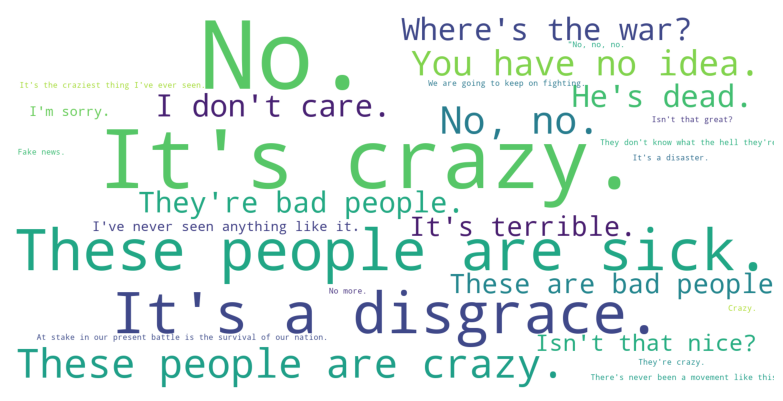

In [25]:
df_neg = df_st[(df_st['Compound']) < 0.000].sort_values(by=['Compound'])

word_count_dict=Counter(df_neg['Sentence'].tolist())
wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=100,background_color="white",random_state=42).generate_from_frequencies(word_count_dict)

fig = plt.figure(1, figsize=(8, 8))
plt.imshow(wordcloud)
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()

In [26]:
df_neg['Sentence'].value_counts().head(10)

Sentence
No.                        19
It's crazy.                14
These people are sick.     12
It's a disgrace.           12
These people are crazy.    11
No, no.                    10
You have no idea.           8
He's dead.                  6
Where's the war?            6
I don't care.               6
Name: count, dtype: int64

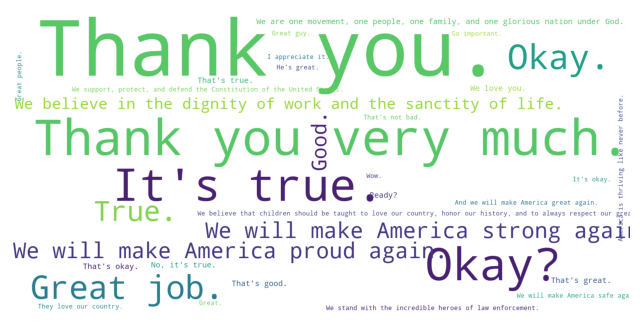

In [27]:
df_pos = df_st[(df_st['Compound']) > 0.000].sort_values(by=['Compound'])
Pos_list=df_pos['Sentence'].value_counts()
wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=100,background_color="white",random_state=42).generate_from_frequencies(Pos_list)

fig = plt.figure(1, figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [28]:
topics = ['Democrats', 'Republican', 'Mexico', 'Obama', 'Climate', 'Canada', 'China', 'America', 
          'Kamala', 'Left', 'Right', 'Black Lives', 'Virus', 'News', 'Giuliani','Biden']
df_m = pd.DataFrame(columns=['topic', 'ave neg', 'ave pos', 'ave neu', 'ave compound', 'sentiment'])

def get_sentiment(x):
    if x > 0.0:
        return "Positive"
    else:
        return "Negative"

def graph_sentiment(ind):
    tokenized_text = sent_tokenize(df['content'][ind])
    results = []
    
    for topic in topics:
        df_topic = df_st[df_st['Sentence'].str.match(r'.*%s.*' % topic) == True ]
        results.append(
            {
                "topic": topic,
                "ave neg": df_topic['Negative'].mean(),
                "ave pos": df_topic['Positive'].mean(),
                "ave neu": df_topic['Neutral'].mean(),
                "ave compound": df_topic['Compound'].mean(),
                "sentiment": get_sentiment(df_topic['Compound'].mean())
            }
        )
    return results

# Use ThreadPoolExecutor for parallel processing
all_results = []
with ThreadPoolExecutor(max_workers=8) as executor:
    future_to_index = {executor.submit(graph_sentiment, ind): ind for ind in df.index}
    
    for future in as_completed(future_to_index):
        all_results.extend(future.result())

# Convert the list of results to a DataFrame and concatenate
df_m = pd.concat([df_m, pd.DataFrame(all_results)], ignore_index=True)

C:\Users\Karthik\AppData\Local\Temp\ipykernel_19988\4083265130.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_m = pd.concat([df_m, pd.DataFrame(all_results)], ignore_index=True)


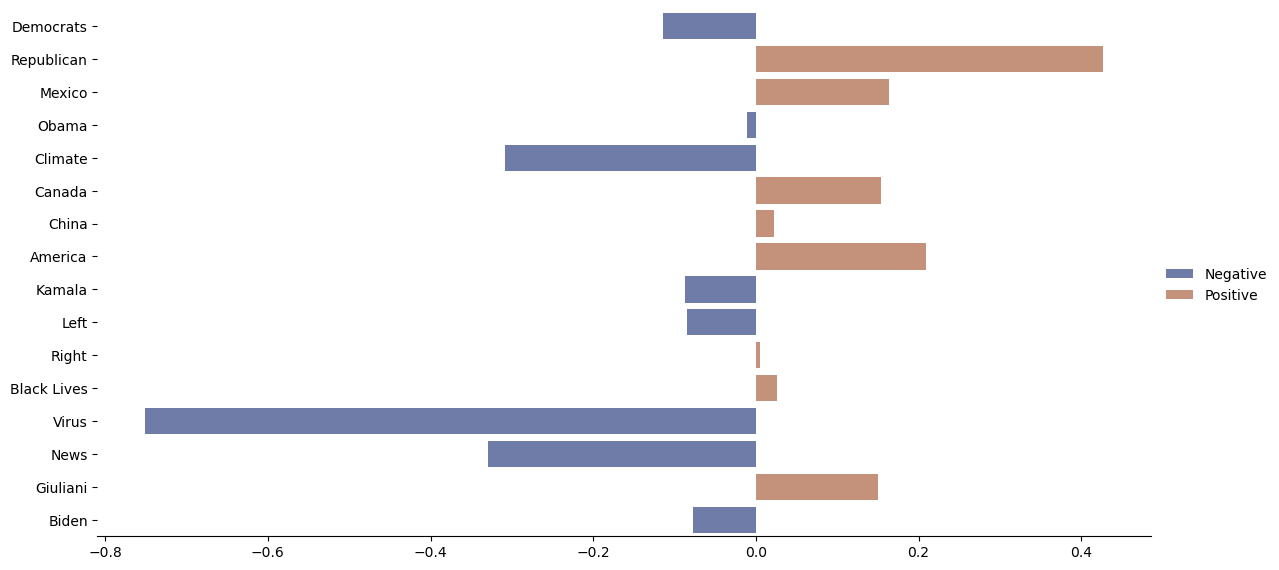

In [29]:

g = sns.catplot(
    data=df_m, kind="bar",
    y="topic", x="ave compound", hue="sentiment",
    errorbar='sd', palette="dark", alpha=.6, height=6, aspect=2
)
g.despine(left=True)
g.set_axis_labels("", "")
g.legend.set_title("")